In [1]:
import zipline as zp
import quandl as qd
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
import os.path

In [2]:
start_date = '2015-01-01'
end_date = '2018-01-01'

companies = ['AAPL', 'MSFT', 'AMZN', 'INTC', 'TSLA']
# Grab data for select companies
qd.ApiConfig.api_key = 'Zx2BTzzcz264ssx748NF'
data = qd.get_table('WIKI/PRICES', ticker = companies, date = {'gte': start_date, 'lte': end_date}, paginate=True)

In [3]:
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,AAPL,2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
1,AAPL,2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2,AAPL,2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
3,AAPL,2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
4,AAPL,2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0


In [4]:
comp_dict = dict.fromkeys(companies, pd.DataFrame(columns = data.columns))

for i, row in data.iterrows():
    if row[0] in comp_dict:
        comp_dict[row[0]]  = comp_dict[row[0]].append(pd.Series(row))
        

In [5]:
comp_dict['AAPL']

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,AAPL,2015-01-02,111.390,111.4400,107.3500,109.330,53204626.0,0.00,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
1,AAPL,2015-01-05,108.290,108.6500,105.4100,106.250,64285491.0,0.00,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2,AAPL,2015-01-06,106.540,107.4300,104.6300,106.260,65797116.0,0.00,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
3,AAPL,2015-01-07,107.200,108.2000,106.6950,107.750,40105934.0,0.00,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
4,AAPL,2015-01-08,109.230,112.1500,108.7000,111.890,59364547.0,0.00,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0
5,AAPL,2015-01-09,112.670,113.2500,110.2100,112.010,53315099.0,0.00,1.0,107.036971,107.587974,104.699961,106.409968,53315099.0
6,AAPL,2015-01-12,112.600,112.6300,108.8000,109.250,49650790.0,0.00,1.0,106.970471,106.998971,103.360455,103.787957,49650790.0
7,AAPL,2015-01-13,111.430,112.8000,108.9100,110.220,67091928.0,0.00,1.0,105.858966,107.160472,103.464955,104.709461,67091928.0
8,AAPL,2015-01-14,109.040,110.4900,108.5000,109.800,48956588.0,0.00,1.0,103.588456,104.965962,103.075454,104.310459,48956588.0
9,AAPL,2015-01-15,110.000,110.0600,106.6600,106.820,60013996.0,0.00,1.0,104.500460,104.557460,101.327446,101.479447,60013996.0


In [6]:
moving_avg_data_20 = dict.fromkeys(companies, [])

In [7]:
# TODO write function for computing 20 day moving average for each company 
# store moving averages in another dict for each company


In [8]:
#Computes moving avg for 20 day window
days = 20

for comp in comp_dict:
    moving_avg_data_20[comp] = comp_dict[comp]['close'].rolling(window = days).mean()
    moving_avg_data_20[comp].index = comp_dict[comp]['date']

In [9]:
def get_dates(dictionary):
    date_index = []
    for comp in dictionary:
        date_index.append(dictionary[comp][:].index)
    return date_index


In [10]:
moving_avg_data_20 = pd.DataFrame(moving_avg_data_20)
moving_avg_data_20.head()

,AAPL,AMZN,INTC,MSFT,TSLA
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN


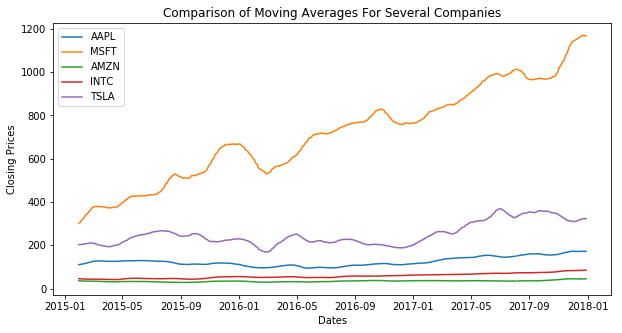

In [11]:
# Combined results into pd dataframe and plot
plt.figure(figsize=(10,5))
plt.plot(moving_avg_data_20)
plt.ylabel('Closing Prices')
plt.xlabel('Dates')
plt.title('Comparison of Moving Averages For Several Companies')
plt.legend(companies, fontsize = 10)
plt.show()

In [12]:
# gather VIX (fear index) for S & D

VIX_data = qd.get(["CHRIS/CBOE_VX8.0", "CHRIS/CBOE_VX8.1", "CHRIS/CBOE_VX8.4"], start_date = start_date, end_date = end_date)
VIX_data.head()

,CHRIS/CBOE_VX8 - Open,CHRIS/CBOE_VX8 - Close
Trade Date,,
2015-01-02,19.40,19.75
2015-01-05,19.70,20.35
2015-01-06,20.33,20.55
2015-01-07,20.25,19.95
2015-01-08,19.90,19.25


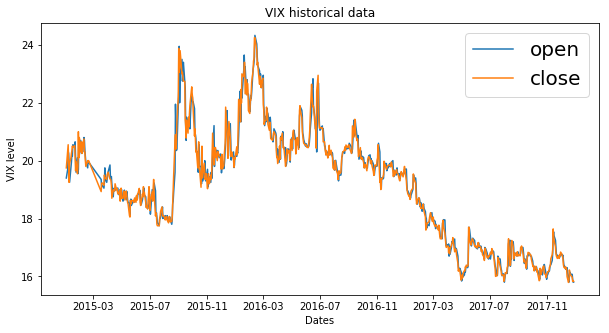

In [13]:
plt.figure(figsize=(10,5))
plt.plot(VIX_data)
plt.ylabel('VIX level')
plt.xlabel('Dates')
plt.legend(['open', 'close'], fontsize = 20)
plt.title('VIX historical data')
plt.show()

In [14]:
# scrape news on companies from marketwatch about relevant companies in your dict
from bs4 import BeautifulSoup
import requests

quote_page = requests.get('https://www.marketwatch.com/newsviewer')

soup = BeautifulSoup(quote_page.content, 'html.parser')

news_boxes = soup.findAll('li', attrs = {'class': 'expandable'})
prefix = "https://www.marketwatch.com/"

In [15]:
print(news_boxes[0])

<li class="expandable" id="1335468594" timestamp="5/25/2018 6:58:22 PM">
<div class="nv-type-cont">
<span class="nv-time">6:58p</span>
</div>
<div class="nv-text-cont">
<h4>
<a class="read-more" href="/story/irish-voters-flock-to-the-polls-to-take-part-in-historic-referendum-on-abortion-2018-05-25" target="_blank">Irish voters flock to the polls for historic referendum on abortion, with exit polls favoring liberalization</a>
</h4>
</div>
<div style="clear:both;"></div>
<div class="nv-details">
<div>
<img class="thumb" src="https://s.marketwatch.com/public/resources/MWimages/MW-GJ921_Irish__MA_20180525110438.jpg"/>
<span>By Ciara Linnane</span>
<span>May 25, 2018, 6:58 p.m. EST</span>
</div>
<p class="abs">
				Emotional scenes at airports and ferry terminals as thousands of eligible Irish voters go #hometovote.
							
							
						<a class="read-more" href="/story/irish-voters-flock-to-the-polls-to-take-part-in-historic-referendum-on-abortion-2018-05-25" rel="nofollow" target="_blank

In [16]:
def get_article(news_box):
    pagelink = prefix + news_box.find('a', attrs = {'href': True}).get('href')
    news_page  = requests.get(pagelink)
    newsBlock = BeautifulSoup(news_page.content, 'html.parser').find('div', attrs= {'id': 'article-body'})
    if newsBlock is None:
        return ""
    news = ""
    for paragraph in newsBlock.findAll('p'): 
        news = news + paragraph.text.replace('\r\n', "").replace('\xa0', "")
    return news

In [17]:
# scrape array with date, headline, and bodies of most recent articles
news = pd.DataFrame(columns = ['Date','Headlines', 'Articles'])

for item in news_boxes:
    #relevant features
    headline = item.find('h4').getText().strip('\n')
    article = get_article(item)
    date = item.attrs.get('timestamp')
    news = news.append(pd.DataFrame([[date, headline, article]], columns = ['Date','Headlines', 'Articles']))
    
news.head()

,Date,Headlines,Articles
0,5/25/2018 6:58:22 PM,Irish voters flock to the polls for historic r...,Irish voters flocked to the polls on Friday to...
0,5/25/2018 6:31:40 PM,Steve Kerr expresses dismay with league manage...,Golden State Warriors coach Steve Kerr is whis...
0,5/25/2018 6:17:48 PM,Why mutual fund managers on a hot streak may b...,"“Hot hands” — in sports, business, and investi..."
0,5/25/2018 6:17:12 PM,Here’s the stock trading secret that market ti...,Call it the market- timing industry’s dirty li...
0,5/25/2018 6:16:49 PM,Why you probably have less money invested in s...,It is risky to ride a bicycle blindfolded. It ...


In [18]:
# compute array using bollinger bands for each company
# a 1 indicates it is above band, indicating to sell, 0 indicates it is below band, indicating to buy
# a 0 indicates it is within the bands, so don't do anything

ewma_26 = dict.fromkeys(companies, [])
ewma_12 = dict.fromkeys(companies, [])

for comp in comp_dict:
    ewma_26[comp] = comp_dict[comp]['close'].ewm(span=26).mean()
    ewma_26[comp].index = comp_dict[comp]['date']
#     ewma_26[comp] = ewma_26[comp].dropna()

for comp in comp_dict:
    ewma_12[comp] = comp_dict[comp]['close'].ewm(span=12).mean()
    ewma_12[comp].index = comp_dict[comp]['date']
#     ewma_12[comp] = ewma_12[comp].dropna()

ewma_26 = pd.DataFrame(ewma_26)
ewma_12 = pd.DataFrame(ewma_12)


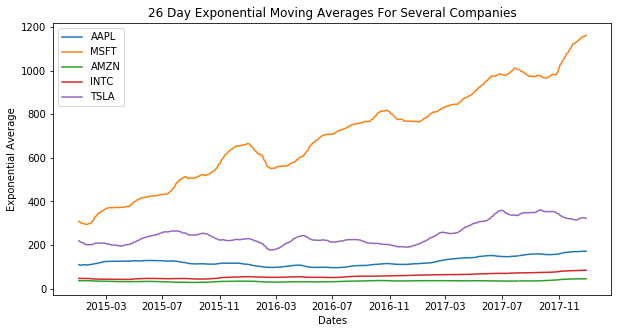

In [19]:
# Combined results into pd dataframe and plot
plt.figure(figsize=(10,5))
plt.plot(ewma_26)
plt.ylabel('Exponential Average')
plt.xlabel('Dates')
plt.title('26 Day Exponential Moving Averages For Several Companies')
plt.legend(companies, fontsize = 10)
plt.show()

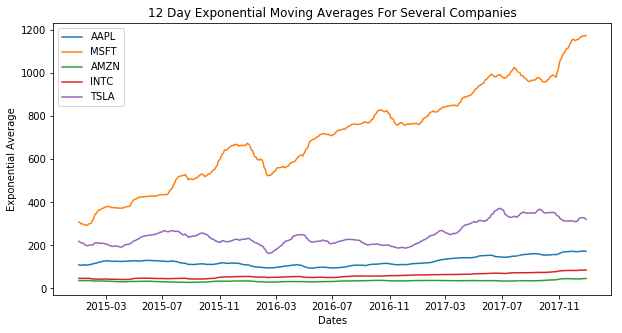

In [20]:
# Combined results into pd dataframe and plot
plt.figure(figsize=(10,5))
plt.plot(ewma_12)
plt.ylabel('Exponential Average')
plt.xlabel('Dates')
plt.title('12 Day Exponential Moving Averages For Several Companies')
plt.legend(companies, fontsize = 10)
plt.show()

In [21]:
def get_rsi(df, period):
    """Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param period: time frame between each set 
    :return: pandas.DataFrame
    """
    start_index = df.index[0]
    rsi = []
    for i in range(start_index + 1, start_index + len(df) + 1):
        gains = 0.0
        losses = 0.0
        if i >= start_index + 1 + len(df) - period:
            rsi.append(np.nan)
        else:
            for j in range(i, i + period):
                diff = df[j] - df[j - 1]
                if diff > 0:
                    gains +=diff
                elif diff < 0:
                    losses += abs(diff)
            rsi.append(round(100 - (100 / (1 + gains / losses)), 2))
            
    return pd.DataFrame(rsi)

In [22]:
rsi_14 = dict.fromkeys(companies, pd.DataFrame())

In [23]:
for comp in comp_dict:
#     print(comp)
#     print(get_rsi(comp_dict[comp]['close'], 14))
    rsi_14[comp] = get_rsi(comp_dict[comp]['close'], 14)
    rsi_14[comp].index = comp_dict[comp]['date'][0:len(comp_dict[comp])]
#     rsi_14[comp] = rsi_14[comp].dropna()
    rsi_14[comp] = rsi_14[comp].rename(columns = {0: "RSI"})

rsi_14['AAPL'].head()

,RSI
date,
2015-01-02,57.67
2015-01-05,66.44
2015-01-06,55.81
2015-01-07,62.83
2015-01-08,62.12


In [24]:
def on_balance_volume(df, n):
    """Calculate On-Balance Volume for given data.
    
    :param df: pandas.DataFrame
    :param n: period
    :return: pandas.DataFrame
    """
    i = df.index[1]
    OBV = [0]
    while i < df.index[-1]:
        if df.loc[i + 1, 'close'] - df.loc[i, 'close'] > 0:
            OBV.append(df.loc[i + 1, 'volume'])
        if df.loc[i + 1, 'close'] - df.loc[i, 'close'] == 0:
            OBV.append(0)
        if df.loc[i + 1, 'close'] - df.loc[i, 'close'] < 0:
            OBV.append(-df.loc[i + 1, 'volume'])
        i = i + 1
    OBV = pd.Series(OBV, index= list(range(df.index[0] , df.index[-1])))
    OBV_ma = pd.Series(OBV.rolling(n, min_periods=n).mean(), name='OBV_' + str(n))
    df = df.join(OBV_ma)
    return df

In [25]:
OBV_10 = dict.fromkeys(companies, pd.DataFrame())

for comp in comp_dict:
    OBV_10[comp] = on_balance_volume(comp_dict[comp].loc[:, ['high', 'low','open','close', 'volume']],10)
    OBV_10[comp].index = comp_dict[comp]['date'][0:len(comp_dict[comp]['date'])]
#     OBV_10[comp] = OBV_10[comp].dropna()
    
OBV_10['TSLA'].head()

,high,low,open,close,volume,OBV_10
date,,,,,,
2015-01-02,223.2500,213.2600,222.87,219.310,4764443.0,NaN
2015-01-05,216.5000,207.1626,214.55,210.090,5368477.0,NaN
2015-01-06,214.2000,204.2100,210.06,211.280,6261936.0,NaN
2015-01-07,214.7800,209.7800,213.35,210.950,2968390.0,NaN
2015-01-08,213.7999,210.0100,212.81,210.615,3442509.0,NaN


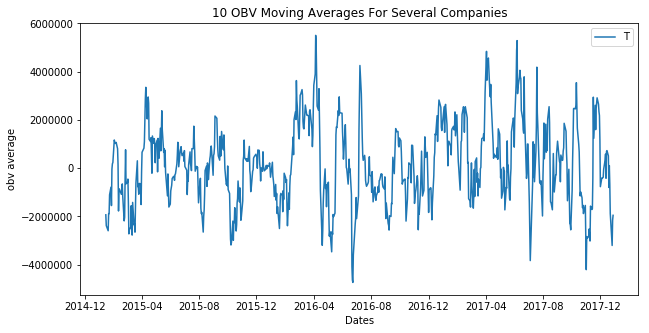

In [26]:
# Combined results into pd dataframe and plot
plt.figure(figsize=(10,5))
plt.plot(OBV_10['TSLA']['OBV_10'])
plt.ylabel('obv average')
plt.xlabel('Dates')
plt.title('10 OBV Moving Averages For Several Companies')
plt.legend('TSLA', fontsize = 10)
plt.show()

In [27]:
rsi_14['TSLA'].head()

,RSI
date,
2015-01-02,30.52
2015-01-05,45.82
2015-01-06,43.64
2015-01-07,37.93
2015-01-08,44.93


In [28]:
OBV_10['TSLA'].head()

,high,low,open,close,volume,OBV_10
date,,,,,,
2015-01-02,223.2500,213.2600,222.87,219.310,4764443.0,NaN
2015-01-05,216.5000,207.1626,214.55,210.090,5368477.0,NaN
2015-01-06,214.2000,204.2100,210.06,211.280,6261936.0,NaN
2015-01-07,214.7800,209.7800,213.35,210.950,2968390.0,NaN
2015-01-08,213.7999,210.0100,212.81,210.615,3442509.0,NaN


In [29]:
# combine numerous datasets into by company + category of data
# 20 day sma, vix data, ewma 12, ewma 26, rsi_26, obv
all_data = dict.fromkeys(companies, pd.DataFrame())

for comp in all_data:
    all_data[comp] = pd.DataFrame({'20_day_sma': moving_avg_data_20[comp], 'ewma_12': ewma_12[comp], 
                                   'ewma_26': ewma_26[comp], 'rsi_14': rsi_14[comp]['RSI'], 'high': OBV_10[comp]['high'],
                                   'low': OBV_10[comp]['low'],'open': OBV_10[comp]['open'], 'close': OBV_10[comp]['close'],
                                   'volume': OBV_10[comp]['volume'],'obv_10': OBV_10[comp]['OBV_10']
                                   })
    all_data[comp] = all_data[comp].dropna()

print(all_data['TSLA'].tail())

            20_day_sma   close     ewma_12     ewma_26      high     low  \
date                                                                       
2017-12-04    310.0515  305.20  310.856725  316.360437  308.2650  300.61   
2017-12-05    309.9320  303.70  309.755690  315.422627  308.0000  301.00   
2017-12-06    310.4560  313.26  310.294815  315.262432  313.3900  300.00   
2017-12-07    310.7155  311.24  310.440228  314.964474  318.6341  311.05   
2017-12-08    311.3225  315.13  311.161731  314.976735  316.9800  311.26   

              obv_10   open  rsi_14     volume  
date                                            
2017-12-04 -411624.2  306.5   63.30  5811205.0  
2017-12-05 -418587.4  302.0   58.33  4628462.0  
2017-12-06 -400092.3  300.1   48.96  7160938.0  
2017-12-07 -380024.5  312.0   52.60  4705140.0  
2017-12-08  -45787.8  314.6   47.62  3442898.0  


In [30]:
for comp in all_data:
    company = comp
    all_data[comp].to_csv(f'./rsc/{company}_data.csv', sep = ',')